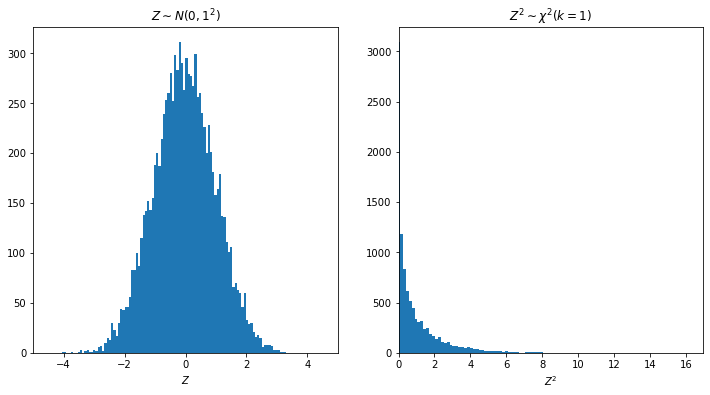

In [235]:
import numpy as np
import matplotlib.pyplot as plt

num_samples = 10000
bins = 100

Z = np.random.normal(0, 1, num_samples)

fig, ax = plt.subplots(1,2,figsize=(12,6))
hist, bin_edges = np.histogram(Z, bins=bins)
ax[0].set_title(r"$Z \sim N(0, 1^2)$")
ax[0].bar(bin_edges[:-1], hist, width=np.diff(bin_edges))
ax[0].set_xlim(-5,5)
ax[0].set_xlabel('$Z$')

hist, bin_edges = np.histogram(Z**2, bins=bins)
ax[1].set_title(r"$Z^2 \sim \chi^2(k=1)$")
ax[1].bar(bin_edges[:-1], hist, width=np.diff(bin_edges))
ax[1].set_xlim(0)
ax[1].set_xlabel('$Z^2$')
plt.show()

In [242]:
from ipywidgets import interactive

def plot(k=1):
    num_samples = 1000
    bins = 50

    np.random.seed(42)

    fig, ax = plt.subplots(1,2,figsize=(12,6))
    ax[0].set_title(r"$Z \sim N(0, 1^2)$")
    ax[0].set_xlabel('$Z$')
    ax[0].set_xlim(-5,5)
    ax[0].set_ylim(0,80)

    for i in range(k):
        Z = np.random.normal(0, 1, num_samples)
        hist, bin_edges = np.histogram(Z, bins=bins)
        ax[0].bar(bin_edges[:-1], hist, width=np.diff(bin_edges), alpha=.2, label="$Z_{"+str(i+1)+"}$")
    ax[0].legend()

    Z_squared = np.zeros(num_samples)
    for i in range(k):
        Z_squared += np.random.normal(0, 1, num_samples) ** 2
    hist, bin_edges = np.histogram(Z_squared, bins=bins)
    ax[1].set_title(rf"$\sum_i Z_i^2 \sim \chi^2(k={k})$ ($\mu={k}$, $\sigma^2={2*k}$)")
    ax[1].bar(bin_edges[:-1], hist, width=np.diff(bin_edges))
    ax[1].set_xlim(0,40)
    ax[1].set_ylim(0,200)
    ax[1].set_xlabel('$Z^2$')
    plt.show()

interactive(plot, k=(1,16,1))

interactive(children=(IntSlider(value=1, description='k', max=16, min=1), Output()), _dom_classes=('widget-int…

$$
X_1, X_2, \cdots , X_n \sim \mathcal N(\mu, \sigma^2) \\
$$


sample mean: $\bar X$ \
sample variance: $s^2 = \frac{1}{N-1} \sum_{i=1}^{n} (X_i - \bar X)^2$

$$
\frac{(N-1)s^2}{\sigma^2} \sim \chi_{n-1}^2
$$

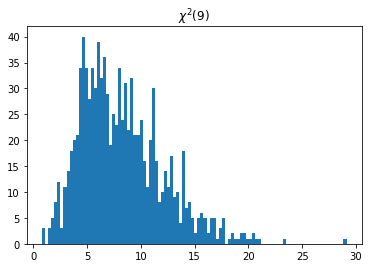

In [313]:
n = 10
sigma = 1

x_squared = []

for _ in range(1000):
    X = np.random.normal(loc=0, scale=sigma, size=n)
    s = X.std()
    x_squared.append((n-1) * s**2 / sigma**2)

plt.title(f"$\chi^2({n-1})$")
plt.hist(x_squared, bins=100)
plt.show()

### Association test between disease and a variant (PLINK)

The genotypic test provides a general test of association in the 2-by-3 table of disease-by-genotype. The dominant and recessive models are tests for the minor allele (which is the minor allele can be found in the output of either the --assoc or the --freq commands. That is, if D is the minor allele (and d is the major allele):

```
Allelic:         D        versus      d
Dominant:     (DD, Dd)    versus      dd
Recessive:       DD       versus   (Dd, dd)
Genotypic:       DD       versus      Dd         versus    dd
```